In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display
%matplotlib inline

# Exploring probabilities with coin flips

We want to simulate flipping a coin some number of times (N) to see the number of heads we get.

In [2]:
nheads = 0
for i in range(0,50):
    if np.random.random() > 0.5:
        nheads += 1
print(nheads)

21


If we make this into a function, we can start to run multiple coin-flip trials.

#### What do you expect the ditribution of the number of heads to look like?

In [3]:
def get_nheads(nflips):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > 0.5:
            nheads += 1
    return nheads

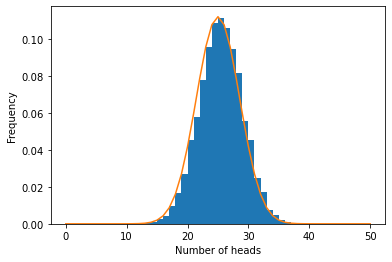

24.9725
3.557210107654593


In [4]:
nheads_exp = []
ntests = 10000
nflips = 50
for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

plt.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)), density = True)
plt.ylabel("Frequency")
plt.xlabel("Number of heads")

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))

plt.show()

print(np.mean(nheads_exp))
print(np.std(nheads_exp))

In [5]:
np.sqrt(nflips*p*(1-p))

3.5355339059327378

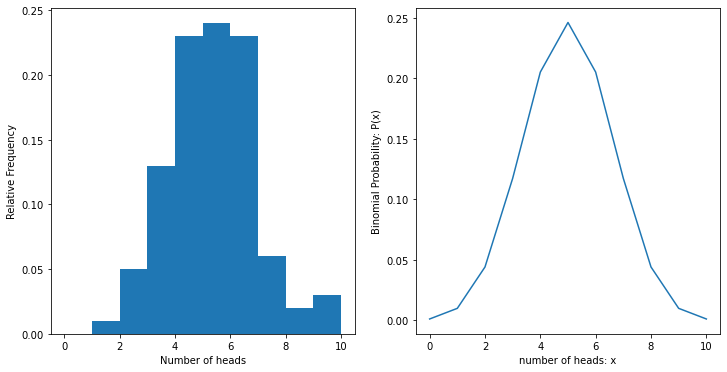

In [6]:
plt.ion()
fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
fig1.canvas.draw()

nheads_exp = []
ntests = 100
nflips = 10

p = .5
x = np.array(range(nflips+1))
ax2.plot(x, binom.pmf(x, nflips, p))
ax2.set_ylabel("Binomial Probability: P(x)")
ax2.set_xlabel("number of heads: x")

for i in range(ntests):
    iheads = get_nheads(nflips)
    nheads_exp.append(iheads)

    ax1.clear()
    ax1.hist(nheads_exp, range=(0,nflips), bins = nflips, density=True)
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)


How do you think the mean and variance of this distribution compares with our ideal case?

In [7]:
print("mean = ",np.mean(nheads_exp))
print("std. dev. = ",np.std(nheads_exp))

mean =  4.86
std. dev. =  1.600124995117569


## Judging the fairness of a coin

Now how can we determine if a coin is fair?

In [8]:
def get_nheads_weighted(nflips, weight):
    nheads = 0
    for i in range(nflips):
        if np.random.random() > weight:
            nheads += 1
    return nheads

Number of heads = 523


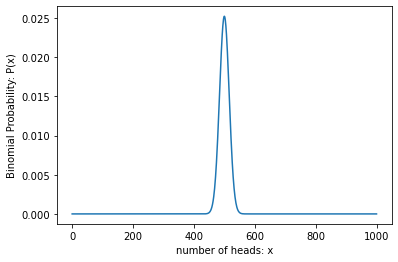

Fair coin: ave. nheads = 500.0, sigma = 15.811388300841896
Nheads between 468 and 531
2-sigma prob. to be fair =  0.9569647612128784


In [100]:
fairness_weight = 0.45

nflips = 1000

nheads = get_nheads_weighted(nflips, fairness_weight)
print("Number of heads =",nheads)

p = .5
x = np.array(range(nflips+1))
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")
plt.show()

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)


## Running many tests

What if we tried running this test of our coin many times? 

Can we do a better job testing our coin this way?

In [108]:
def get_tests(ntests, nflips):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads(nflips)
        nheads_exp.append(iheads)

    return nheads_exp

In [93]:
def get_weighted_tests(ntests, nflips, weight):
    nheads_exp = []
    for i in range(ntests):
        iheads = get_nheads_weighted(nflips, weight)
        nheads_exp.append(iheads)

    return nheads_exp

Mean number of heads = 549.5
Fair coin: ave. nheads = 500.0, sigma = 15.811388300841896
Nheads between 468 and 531
2-sigma prob. to be fair =  0.9569647612128784


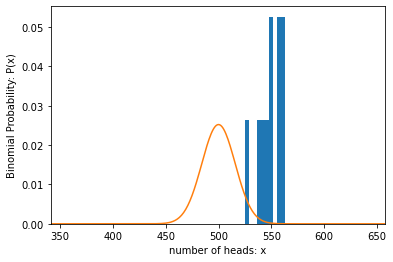

In [112]:
fairness_weight = 0.45

nflips = 1000
ntests = 10

nheads = get_weighted_tests(ntests, nflips, fairness_weight)
print("Mean number of heads =",np.mean(nheads))

p = .5
x = np.array(range(nflips+1))
plt.hist(nheads,density=True)
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)

plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.show()


Mean number of heads = 498.94
Fair coin: ave. nheads = 500.0, sigma = 15.811388300841896
Nheads between 468 and 531
2-sigma prob. to be fair =  0.9569647612128784


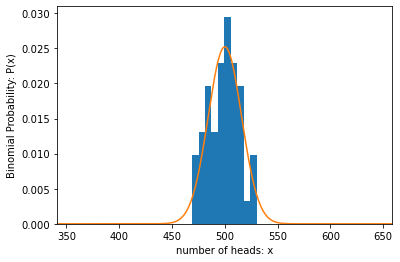

In [113]:
nflips = 1000
ntests = 50

nheads = get_tests(ntests, nflips)
print("Mean number of heads =",np.mean(nheads))

p = .5
x = np.array(range(nflips+1))
plt.hist(nheads,density=True)
plt.plot(x, binom.pmf(x, nflips, p))
plt.ylabel("Binomial Probability: P(x)")
plt.xlabel("number of heads: x")

fair_mean = nflips*p
fair_sigma = np.sqrt(fair_mean*(1-p))

print("Fair coin: ave. nheads = {}, sigma = {}".format(fair_mean,fair_sigma))

bsum = 0
for x in range(int(fair_mean-2*fair_sigma), int(fair_mean+2*fair_sigma)+1):
    bsum += binom.pmf(x, nflips, p)

print("Nheads between {} and {}".format(int(fair_mean-2*fair_sigma),int(fair_mean+2*fair_sigma)))
print("2-sigma prob. to be fair = ",bsum)

plt.xlim(int(fair_mean-10*fair_sigma),int(fair_mean+10*fair_sigma))
plt.show()


## Running many experiments (each experiment being many tests)

What if we tried running this same experiment many times? 

Can we do a better job testing our coin this way?

In [11]:
ntests = 100
nflips = 10
test_means = []
nexperiments = 100

#plt.ion()
#fig1 = plt.figure(figsize=(12,5))
#ax1 = fig1.add_subplot(121)
#fig1.canvas.draw()

for i in range(nexperiments):
    nheads_exp = get_mean(ntests, nflips)
    test_means.append(np.mean(nheads_exp))

#    ax1.clear()
#    ax1.hist(test_means, bins = nflips, density=True)
#    ax1.set_ylabel("Relative Frequency")
#    ax1.set_xlabel("Mean number of heads")
#    fig1.canvas.draw()
#    display.display(plt.gcf())
#    display.clear_output(wait=True)
#    time.sleep(0.05)

mu = np.mean(test_means)
sigma = np.std(test_means)
print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

Average of the distributions of mean number of heads = 4.9979 +/- 0.1568585031166624


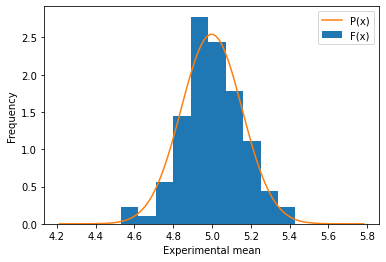

In [12]:
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
plt.hist(test_means, bins = nflips, density=True, label="F(x)")
plt.plot(x,y, label="P(x)")
plt.ylabel("Frequency")
plt.xlabel("Experimental mean")
plt.legend()
plt.show()

#1.61/np.sqrt(100)

Average of the distributions of mean number of heads = 5.4913 +/- 0.14828118559008083


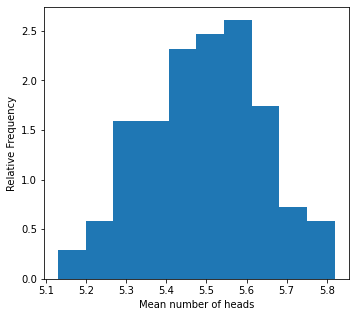

In [14]:
ntests = 100
nflips = 10
test_means = []
nexperiments = 100

weight = 0.45

plt.ion()
fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(121)
fig1.canvas.draw()

for i in range(nexperiments):
    nheads_exp = get_weighted_mean(ntests, nflips, weight)
    test_means.append(np.mean(nheads_exp))

    ax1.clear()
    ax1.hist(test_means, bins = nflips, density=True)
    ax1.set_ylabel("Relative Frequency")
    ax1.set_xlabel("Mean number of heads")
    fig1.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

mu = np.mean(test_means)
sigma = np.std(test_means)
print("Average of the distributions of mean number of heads = {} +/- {}".format(mu,sigma))

# Next: what about a 4-sided die

Now I want you to break out into groups and come up with a plan for how you would set up this same kind of experiment for a 4-sided die.

You don't need to write the code, just a set of steps - what you would implement with code (pseudo-code)

### Coding it up

This is one way this could be done. The main points are the end result, not the specific implementation.

In [51]:
nfaces = []
N_rolls = 50
for i in range(N_rolls):
    roll = np.random.random()
    if roll < 0.25:
        nfaces.append(1)
    if roll > 0.25 and roll < 0.5:
        nfaces.append(2)
    if roll > 0.5 and roll < 0.75:
        nfaces.append(3)
    if roll > 0.75:
        nfaces.append(4)
print(nfaces)
print(np.mean(nfaces))

[2, 1, 4, 1, 2, 3, 2, 4, 2, 4, 1, 2, 2, 2, 4, 4, 1, 2, 1, 3, 3, 4, 4, 2, 4, 4, 3, 3, 3, 3, 2, 2, 1, 2, 4, 2, 2, 4, 2, 3, 4, 1, 2, 2, 1, 1, 2, 2, 4, 2]
2.5


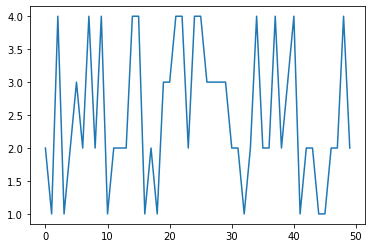

In [52]:
plt.plot(nfaces)
plt.show()

In [40]:
def get_nfaces(nrolls):
    nfaces = []
    for i in range(nrolls):
        roll = np.random.random()
        if roll < 0.25:
            nfaces.append(1)
        if roll > 0.25 and roll < 0.5:
            nfaces.append(2)
        if roll > 0.5 and roll < 0.75:
            nfaces.append(3)
        if roll > 0.75:
            nfaces.append(4)
    return nfaces

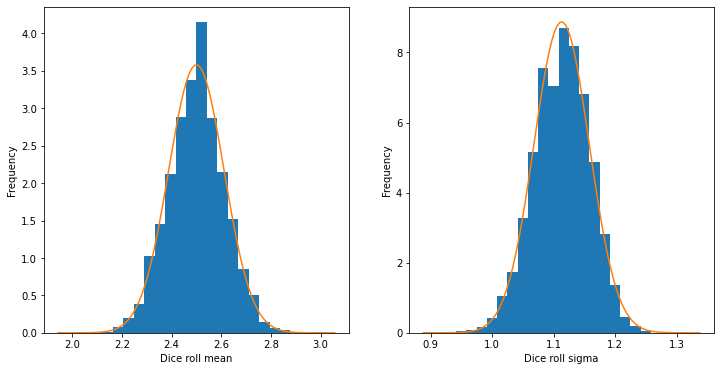

In [59]:
dice_exp = []
ntests = 10000
nrolls = 100
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    dice_exp.append(ifaces)

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

dice_means = np.mean(np.array(dice_exp),axis=1)
ax1.hist(dice_means, bins=20, density=True)
mu = np.mean(dice_means)
sigma = np.std(dice_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label="P(x)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Dice roll mean")

dice_stds = np.std(np.array(dice_exp),axis=1)
ax2.hist(dice_stds, bins=20, density=True)
mu = np.mean(dice_stds)
sigma = np.std(dice_stds)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax2.plot(x,y, label="P(x)")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Dice roll sigma")

plt.show()

In [60]:
print("die sigma = {} +/- {}".format(mu,sigma))

die sigma = 1.112904246884123 +/- 0.04494882943173171


In [49]:
def get_nfaces_unfair(nrolls):
    nfaces = []
    for i in range(nrolls):
        roll = np.random.random()
        if roll < 0.35:
            nfaces.append(1)
        if roll > 0.35 and roll < 0.5:
            nfaces.append(2)
        if roll > 0.5 and roll < 0.65:
            nfaces.append(3)
        if roll > 0.65:
            nfaces.append(4)
    return nfaces

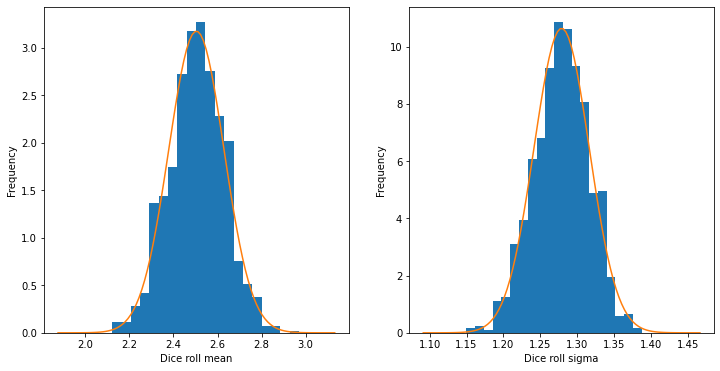

In [57]:
dice_exp = []
labels = ['1','2','3','4']
ntests = 1000
nrolls = 100
for i in range(ntests):
    ifaces = get_nfaces_unfair(nrolls)
    dice_exp.append(ifaces)

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

dice_means = np.mean(np.array(dice_exp),axis=1)
ax1.hist(dice_means, bins=20, density=True)
mu = np.mean(dice_means)
sigma = np.std(dice_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label="P(x)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Dice roll mean")

dice_stds = np.std(np.array(dice_exp),axis=1)
ax2.hist(dice_stds, bins=20, density=True)
mu = np.mean(dice_stds)
sigma = np.std(dice_stds)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax2.plot(x,y, label="P(x)")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Dice roll sigma")

plt.show()


In [58]:
print("die sigma = {} +/- {}".format(mu,sigma))

die sigma = 1.2788677510672637 +/- 0.03750300361516744


In [89]:
dice_exp[2].count(4)

20

In [71]:
def get_roll():
    roll = np.random.random()
    if roll < 0.35:
        return 1
    if roll >= 0.35 and roll < 0.5:
        return 2
    if roll >= 0.5 and roll < 0.65:
        return 3
    if roll >= 0.65:
        return 4


In [72]:

for i in range(50):
    get_roll()

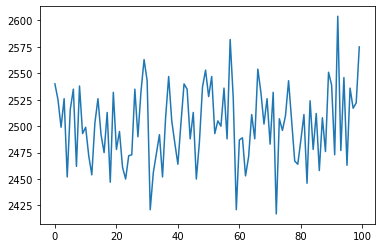

In [69]:
plt.plot(np.sum(np.array(dice_exp),axis=0))
plt.show()

In [18]:
    #ax1.hist(nheads_exp, bins = (max(nheads_exp)-min(nheads_exp)))
    #ax1.set_ylabel("Frequency")
    #ax1.set_xlabel("Number of heads")
    #plt.show()
    #plt.draw()
    #plt.pause(0.1)
